<a href="https://colab.research.google.com/github/Tiamiyu1/3rd-Place-Solution-on-Predict-the-HackerEarth-employee-burn-out-rate-on-/blob/main/Data_Preprocessing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Reputation Management with Data

## Modeling public opinion on Education in Africa/Morocco

## Loading the Necessary Libraries

In [1]:
# pip install snscrape
# !pip install git+https://github.com/JustAnotherArchivist/snscrape.git
# import snscrape.modules.twitter as sntwitter
import numpy as np
import pandas as pd
import itertools
import json
# https://github.com/MartinKBeck/TwitterScraper/blob/master/snscrape/python-wrapper/snscrape-python-wrapper.ipynb
# https://link.springer.com/article/10.1007/s42979-023-01790-5
# https://techcommunity.microsoft.com/t5/educator-developer-blog/how-to-scrape-twitter-data-for-sentiment-analysis-with-python/ba-p/3593365
# https://pub.towardsai.net/scraping-tweets-using-snscrape-and-building-sentiment-classifier-13811dadd11d

### Loading the data in form of a csv

In [4]:
df = pd.read_csv('/content/drive/MyDrive/SCI/E-Reputation Management/Internship/tweet_65k.csv')

<ipython-input-4-2c5549351cb8>:1: DtypeWarning: Columns (2,3,5,8,11,13,15,16,18,20,21,22,23,24,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/SCI/E-Reputation Management/Internship/tweet_65k.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128357 entries, 0 to 128356
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               128357 non-null  object 
 1   date              128357 non-null  object 
 2   rawContent        95589 non-null   object 
 3   renderedContent   64533 non-null   object 
 4   id                64533 non-null   float64
 5   user              64533 non-null   object 
 6   replyCount        64533 non-null   float64
 7   retweetCount      64533 non-null   float64
 8   likeCount         64533 non-null   object 
 9   quoteCount        64532 non-null   float64
 10  conversationId    64532 non-null   float64
 11  lang              64532 non-null   object 
 12  source            0 non-null       float64
 13  sourceUrl         1 non-null       object 
 14  sourceLabel       0 non-null       float64
 15  links             20315 non-null   object 
 16  media             20

- From above, it can be seen that out of 120k tweets, only 64533 are completely filled. The missing values might be due to deleted twwets or some of reasons.

- That being said, we will removed the tweets with missing ids and selcted just a few columns to work with.

In [6]:
df.columns

Index(['url', 'date', 'rawContent', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'links',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card', 'viewCount', 'vibe', 'bookmarkCount'],
      dtype='object')

In [7]:
# Remove with with non existent tweet ids

data  = df[df.id.notnull()]
data.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,bookmarkCount
0,https://twitter.com/Okaikor/status/15209142826...,2022-05-01 23:53:16+00:00,Are y’all following the work that youth (aka E...,Are y’all following the work that youth (aka E...,1.520914e+18,"{'username': 'Okaikor', 'id': 21047723, 'displ...",0.0,2.0,3,0.0,...,NaN,"[{'username': 'equal_education', 'id': 1572733...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,https://twitter.com/Bestmarshal/status/1520913...,2022-05-01 23:51:14+00:00,@osazone23 @renoomokri Education have been in ...,@osazone23 @renoomokri Education have been in ...,1.520914e+18,"{'username': 'Bestmarshal', 'id': 1444036032, ...",3.0,0.0,7,0.0,...,"{'username': 'oghomwenrhiere', 'id': 105870574...","[{'username': 'renoomokri', 'id': 264248576, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,https://twitter.com/ActivistNdasadu/status/152...,2022-05-01 22:58:54+00:00,We have deliver in the hard to reach marginali...,We have deliver in the hard to reach marginali...,1.520901e+18,"{'username': 'ActivistNdasadu', 'id': 10655801...",0.0,0.0,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,https://twitter.com/Davidbieri3/status/1520899...,2022-05-01 22:56:15+00:00,@BetoORourke Send the kids to backwoods and po...,@BetoORourke Send the kids to backwoods and po...,1.520900e+18,"{'username': 'Davidbieri3', 'id': 150523001279...",0.0,0.0,0,0.0,...,"{'username': 'BetoORourke', 'id': 342863309, '...","[{'username': 'BetoORourke', 'id': 342863309, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,https://twitter.com/Marine34331459/status/1520...,2022-05-01 22:56:13+00:00,Africa lost confidence and ability to Grow aft...,Africa lost confidence and ability to Grow aft...,1.520900e+18,"{'username': 'Marine34331459', 'id': 825053330...",0.0,0.0,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [8]:
# Getting some selected features to work with.
features_to_use = ['id', 'date','user', 'rawContent', 'renderedContent', 'likeCount','retweetCount', 'place', 'lang', 'hashtags']
data = data[features_to_use]
print(data.info())
print('*' *50)
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64533 entries, 0 to 128356
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               64533 non-null  float64
 1   date             64533 non-null  object 
 2   user             64533 non-null  object 
 3   rawContent       64533 non-null  object 
 4   renderedContent  64533 non-null  object 
 5   likeCount        64533 non-null  object 
 6   retweetCount     64533 non-null  float64
 7   place            1689 non-null   object 
 8   lang             64532 non-null  object 
 9   hashtags         22452 non-null  object 
dtypes: float64(2), object(8)
memory usage: 5.4+ MB
None
**************************************************


,id,date,user,rawContent,renderedContent,likeCount,retweetCount,place,lang,hashtags
0,1.520914e+18,2022-05-01 23:53:16+00:00,"{'username': 'Okaikor', 'id': 21047723, 'displ...",Are y’all following the work that youth (aka E...,Are y’all following the work that youth (aka E...,3,2.0,NaN,en,NaN
1,1.520914e+18,2022-05-01 23:51:14+00:00,"{'username': 'Bestmarshal', 'id': 1444036032, ...",@osazone23 @renoomokri Education have been in ...,@osazone23 @renoomokri Education have been in ...,7,0.0,NaN,en,NaN
2,1.520901e+18,2022-05-01 22:58:54+00:00,"{'username': 'ActivistNdasadu', 'id': 10655801...",We have deliver in the hard to reach marginali...,We have deliver in the hard to reach marginali...,3,0.0,NaN,en,NaN
3,1.520900e+18,2022-05-01 22:56:15+00:00,"{'username': 'Davidbieri3', 'id': 150523001279...",@BetoORourke Send the kids to backwoods and po...,@BetoORourke Send the kids to backwoods and po...,0,0.0,NaN,en,NaN
4,1.520900e+18,2022-05-01 22:56:13+00:00,"{'username': 'Marine34331459', 'id': 825053330...",Africa lost confidence and ability to Grow aft...,Africa lost confidence and ability to Grow aft...,3,0.0,NaN,en,NaN


In [9]:
# data_sort = data.sort_values(by='place').reset_index()
# place = data_sort[data_sort['place'].notnull()]
# no_place = data_sort[data_sort['place'].isnull()]

# import ast
# place['location']  = place["place"].apply(ast.literal_eval).str.get("country")
# no_place['location']  = 'None'
# data2 = pd.concat([place,no_place])

In [10]:
data.drop(['user', 'place',  'renderedContent', 'hashtags'], axis=1, inplace=True)
data.head()

,id,date,rawContent,likeCount,retweetCount,lang
0,1.520914e+18,2022-05-01 23:53:16+00:00,Are y’all following the work that youth (aka E...,3,2.0,en
1,1.520914e+18,2022-05-01 23:51:14+00:00,@osazone23 @renoomokri Education have been in ...,7,0.0,en
2,1.520901e+18,2022-05-01 22:58:54+00:00,We have deliver in the hard to reach marginali...,3,0.0,en
3,1.520900e+18,2022-05-01 22:56:15+00:00,@BetoORourke Send the kids to backwoods and po...,0,0.0,en
4,1.520900e+18,2022-05-01 22:56:13+00:00,Africa lost confidence and ability to Grow aft...,3,0.0,en


In [11]:
data.nunique()

id              64517
date            64259
rawContent      63193
likeCount         746
retweetCount      286
lang               34
dtype: int64

In [12]:
data.lang.value_counts()

en     62615
fr      1048
qme      202
ro        76
qht       75
in        68
tl        68
und       65
ca        60
es        43
nl        38
ja        27
fi        24
ht        22
it        14
de        14
pt        13
hi        12
cy         7
ar         7
et         7
qam        4
sl         4
tr         3
th         3
pl         3
lt         2
zh         2
ur         1
uk         1
da         1
te         1
ta         1
cs         1
Name: lang, dtype: int64

### Select only tweets that are in English

In [13]:
data = data[data.lang=='en'].drop('lang', axis=1)

In [14]:
data

,id,date,rawContent,likeCount,retweetCount
0,1.520914e+18,2022-05-01 23:53:16+00:00,Are y’all following the work that youth (aka E...,3,2.0
1,1.520914e+18,2022-05-01 23:51:14+00:00,@osazone23 @renoomokri Education have been in ...,7,0.0
2,1.520901e+18,2022-05-01 22:58:54+00:00,We have deliver in the hard to reach marginali...,3,0.0
3,1.520900e+18,2022-05-01 22:56:15+00:00,@BetoORourke Send the kids to backwoods and po...,0,0.0
4,1.520900e+18,2022-05-01 22:56:13+00:00,Africa lost confidence and ability to Grow aft...,3,0.0
...,...,...,...,...,...
128352,1.652849e+18,2023-05-01 01:35:40+00:00,Risks and opportunities of STEM education in A...,0,0.0
128353,1.652845e+18,2023-05-01 01:16:58+00:00,"For some reason, I doubt that, you aren't attr...",0,0.0
128354,1.652842e+18,2023-05-01 01:06:57+00:00,Adoption rate for ai in africa is quite fair a...,0,0.0
128355,1.652841e+18,2023-05-01 01:03:09+00:00,"I have not read this, but what do these books ...",0,0.0


### Check for duplicate records

In [15]:
f'The data set has {data.duplicated().sum()} duplicate records.'

'The data set has 14 duplicate records.'

In [16]:
print('Here are the duplicate records ordered by tweet ids \n *********')
data[data.duplicated(keep=False)].sort_values(by='id')

Here are the duplicate records ordered by tweet ids 
 *********


,id,date,rawContent,likeCount,retweetCount
19419,1.564208e+18,2022-08-29 11:06:54+00:00,@meghagaurasiya @jsaideepak Thanks you so much...,0,0.0
19423,1.564208e+18,2022-08-29 11:06:54+00:00,@meghagaurasiya @jsaideepak Thanks you so much...,0,0.0
22527,1.569117e+18,2022-09-12 00:13:48+00:00,@ELMShuman @DarkMomoSpeaks I beg of you to act...,0,0.0
22529,1.569117e+18,2022-09-12 00:13:48+00:00,@ELMShuman @DarkMomoSpeaks I beg of you to act...,0,0.0
26479,1.576728e+18,2022-10-03 00:15:31+00:00,@DrUmarJohnson Please read my profile and know...,2,0.0
26483,1.576728e+18,2022-10-03 00:15:31+00:00,@DrUmarJohnson Please read my profile and know...,2,0.0
26480,1.576730e+18,2022-10-03 00:24:12+00:00,"@OfficeofMelania 02. would eat, would wear, wh...",2,0.0
26482,1.576730e+18,2022-10-03 00:24:12+00:00,"@OfficeofMelania 02. would eat, would wear, wh...",2,0.0
112478,1.622630e+18,2023-02-06 16:15:59+00:00,"Over the weekend, Bridge Connect Africa Initia...",23,5.0
112482,1.622630e+18,2023-02-06 16:15:59+00:00,"Over the weekend, Bridge Connect Africa Initia...",23,5.0


- We can see cleary from the above that the records were actually duplicated.
- So we will keep the first occurence and drop subsequent occurences of each of them.

In [17]:
data.drop_duplicates(ignore_index=True, inplace=True) # dropped duplicate records

In [18]:
# data2[['rawContent']].sample(50) # No tweet with just hashtags # Random sampling to check for ordinary hashtag tweets

In [19]:
data.head()

,id,date,rawContent,likeCount,retweetCount
0,1.520914e+18,2022-05-01 23:53:16+00:00,Are y’all following the work that youth (aka E...,3,2.0
1,1.520914e+18,2022-05-01 23:51:14+00:00,@osazone23 @renoomokri Education have been in ...,7,0.0
2,1.520901e+18,2022-05-01 22:58:54+00:00,We have deliver in the hard to reach marginali...,3,0.0
3,1.520900e+18,2022-05-01 22:56:15+00:00,@BetoORourke Send the kids to backwoods and po...,0,0.0
4,1.520900e+18,2022-05-01 22:56:13+00:00,Africa lost confidence and ability to Grow aft...,3,0.0


In [ ]:
# Remove punctuation
data['paper_text_processed'] = data['rawContent'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
data['paper_text_processed'] = data['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
data['paper_text_processed'].head()

0    are y’all following the work that youth (aka e...
1    @osazone23 @renoomokri education have been in ...
2    we have deliver in the hard to reach marginali...
3    @betoorourke send the kids to backwoods and po...
4    africa lost confidence and ability to grow aft...
Name: paper_text_processed, dtype: object

In [ ]:
`
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

dataa = data.paper_text_processed.values.tolist()
data_words = list(sent_to_words(dataa))

print(data_words[:1][0][:30])

['are', 'all', 'following', 'the', 'work', 'that', 'youth', 'aka', 'equalisers', 'from', 'equal_education', 'are', 'doing', 'in', 'south', 'africa', 'if', 'not', 'you', 'should', 'be', 'following', 'them', 'it', 'inspiring']


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'tco', 'http','https','see','get','let', 'education','aka', 'go'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# def make_bigrams(texts):
#     return [bigram_mod[doc] for doc in texts]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# !python -m spacy download en_core_web_sm

In [ ]:
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
# data_words_bigrams = make_bigrams(data_words_nostops)

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['follow', 'work', 'youth', 'equaliser', 'follow', 'inspire']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
num_topics=5

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)]


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=2,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(10, 15))
doc_lda = lda_model[corpus]

[(0,
  '0.017*"people" + 0.015*"free" + 0.010*"black" + 0.009*"school" + '
  '0.009*"child" + 0.008*"african" + 0.007*"white" + 0.007*"history" + '
  '0.006*"give" + 0.006*"come" + 0.006*"know" + 0.006*"say" + 0.005*"make" + '
  '0.005*"western" + 0.005*"think"'),
 (1,
  '0.008*"development" + 0.007*"lack" + 0.006*"web" + 0.006*"african" + '
  '0.006*"agriculture" + 0.005*"world" + 0.005*"people" + 0.004*"job" + '
  '0.004*"bring" + 0.004*"road" + 0.004*"look" + 0.004*"watch" + '
  '0.004*"energy" + 0.004*"build" + 0.004*"opportunity"'),
 (2,
  '0.011*"child" + 0.010*"access" + 0.009*"support" + 0.009*"help" + '
  '0.009*"school" + 0.008*"work" + 0.008*"woman" + 0.008*"change" + '
  '0.008*"world" + 0.007*"quality" + 0.007*"community" + 0.006*"girl" + '
  '0.006*"need" + 0.006*"provide" + 0.006*"make"'),
 (3,
  '0.018*"country" + 0.015*"system" + 0.012*"good" + 0.012*"need" + '
  '0.009*"people" + 0.008*"well" + 0.008*"know" + 0.007*"make" + '
  '0.007*"school" + 0.007*"poor" + 0.007*"

In [ ]:
# lda_model.show_topic(5, 15)
# lda_model.show_topics(num_topics=10, num_words=10, log=True, formatted=True)

In [ ]:
# pip install "pandas<2.0.0"

In [ ]:
# !pip install pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.050678 -0.024816       1        1  29.098923
3      0.166447 -0.029466       2        1  24.992818
0      0.153559 -0.041740       3        1  20.702237
4     -0.220496 -0.085897       4        1  16.465400
1     -0.048832  0.181918       5        1   8.740621, topic_info=         Term         Freq        Total Category  logprob  loglift
121      free  3252.000000  3252.000000  Default  30.0000  30.0000
23     people  6080.000000  6080.000000  Default  29.0000  29.0000
75      black  2357.000000  2357.000000  Default  28.0000  28.0000
116   country  5169.000000  5169.000000  Default  27.0000  27.0000
1088     join  2592.000000  2592.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
9        area   184.153099   841.992606   Topic5  -5.9685   0.9172
160      many   201.319754  2199.288135   Topic5  -5.8794   0.0462
523    invest   190.722703  1353.574058   Topic5  -5.9335   0.4775
116   country   209.031943  5169.843450   Topic5  -5.8418  -0.7709
1073      way   193.058776  1692.567973   Topic5  -5.9213   0.2662

[470 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2925      5  0.984411    academia
1790      1  0.900376  accelerate
1790      3  0.002640  accelerate
1790      4  0.066010  accelerate
1790      5  0.029044  accelerate
...     ...       ...         ...
4         2  0.031465       youth
4         3  0.039182       youth
4         4  0.150198       youth
4         5  0.142481       youth
4312      4  0.989821        zoom

[1237 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

In [ ]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.616801712338019

Coherence Score:  0.426968409488102


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')

    return coherence_model_lda.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook,tnrange,tqdm
from gensim import models,corpora
Lda = models.LdaMulticore
coherenceList_umass = []
coherenceList_cv = []
num_topics_list = np.arange(3,26)
for num_topics in tqdm(num_topics_list):
    lda= Lda(corpus=corpus, num_topics=num_topics,id2word = id2word,
             passes=20,chunksize=4000,random_state=43)
    cm = CoherenceModel(model=lda, corpus=corpus,
                        dictionary=id2word, coherence='u_mass')
    coherenceList_umass.append(cm.get_coherence())
    cm_cv = CoherenceModel(model=lda, corpus=corpus,
                           texts=texts, dictionary=id2word, coherence='c_v')
    coherenceList_cv.append(cm_cv.get_coherence())
    vis = gensimvis.prepare(lda, corpus, id2word)
    pyLDAvis.save_html(vis,f'pyLDAvis_{num_topics}.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-6b8a3b837e30>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook,tnrange,tqdm


  0%|          | 0/23 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


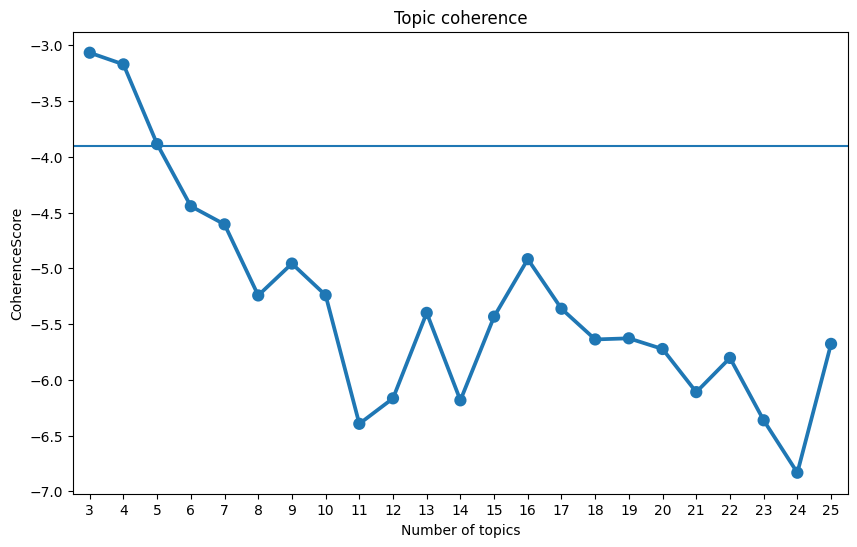

In [ ]:
plotData = pd.DataFrame({'Number of topics':num_topics_list,
                         'CoherenceScore':coherenceList_umass})
f,ax = plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")
sns.pointplot(x='Number of topics',y= 'CoherenceScore',data=plotData)
plt.axhline(y=-3.9)
plt.title('Topic coherence')
plt.savefig('Topic coherence plot.png')

In [ ]:
Lda = models.LdaMulticore
lda_final= Lda(corpus, num_topics=5,id2word = id2word, passes=20,chunksize=4000,random_state=43)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_final.save('lda_final')
id2word.save('id2word')
corpora.MmCorpus.serialize('corpus.mm', corpusm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Lda = models.LdaMulticore
lda_final =Lda.load('lda_final')m
dictionary = corpora.Dictionary.load('id2word')
doc_term_matrix = corpora.MmCorpus('corpus.mm')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
a = lda_final.show_topics(num_topics=12,formatted=False,num_words=10)
b = lda_final.top_topics(doc_term_matrix,dictionary=dictionary,topn=10) # This orders the topics in the decreasing order of coherence score

topic2skillb = {}
topic2csb = {}
topic2skilla = {}
topic2csa = {}
num_topics =lda_final.num_topics
cnt =1

for ws in b:
    wset = set(w[1] for w in ws[0])
    topic2skillb[cnt] = wset
    topic2csb[cnt] = ws[1]
    cnt +=1

for ws in a:
    wset = set(w[0]for w in ws[1])
    topic2skilla[ws[0]+1] = wset

for i in range(1,num_topics+1):
    for j in range(1,num_topics+1):
        if topic2skilla[i].intersection(topic2skillb[j])==topic2skilla[i]:
            topic2csa[i] = topic2csb[j]

finalData = pd.DataFrame([],columns=['Topic','words'])
finalData['Topic']=topic2skilla.keys()
finalData['Topic'] = finalData['Topic'].apply(lambda x: 'Topic'+str(x))
finalData['words']=topic2skilla.values()
finalData['cs'] = topic2csa.values()
finalData.sort_values(by='cs',ascending=False,inplace=True)
finalData.to_csv('CoherenceScore.csv')
finalData

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,words,cs
1,Topic2,"{people, country, black, know, make, need, afr...",-2.622371
0,Topic1,"{child, support, need, quality, health, girl, ...",-2.666644
2,Topic3,"{high, training, join, today, technology, day,...",-3.079328
4,Topic5,"{high, year, child, teacher, university, quali...",-3.224618
3,Topic4,"{high, everywhere, people, powerful, map, lang...",-6.032427


In [ ]:
num_topics =5
vis = gensimvis.prepare(lda_final, doc_term_matrix, dictionary,sort_topics=False)
pyLDAvis.save_html(vis,f'pyLDAvis_{num_topics}.html')
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.157160 -0.028009       1        1  23.592155
1     -0.113262 -0.226313       2        1  34.533063
2     -0.093821  0.202637       3        1  21.020387
3      0.331133 -0.042729       4        1   7.210604
4      0.033110  0.094413       5        1  13.643791, topic_info=        Term         Freq        Total Category  logprob  loglift
193   school  5955.000000  5955.000000  Default  30.0000  30.0000
176     high  4866.000000  4866.000000  Default  29.0000  29.0000
278    child  4997.000000  4997.000000  Default  28.0000  28.0000
614  student  3107.000000  3107.000000  Default  27.0000  27.0000
121     free  3074.000000  3074.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
416      new   448.233172  1796.962464   Topic5  -5.5243   0.6033
248    level   410.561201  1317.019374   Topic5  -5.6121   0.8263
116  country   491.407702  4975.269974   Topic5  -5.4323  -0.3231
64     learn   424.963342  3241.602945   Topic5  -5.5776  -0.0399
98      good   416.114936  3375.532145   Topic5  -5.5986  -0.1015

[319 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
581       1  0.952457  access
581       5  0.047494  access
1390      1  0.157325  accord
1390      2  0.111557  accord
1390      5  0.729414  accord
...     ...       ...     ...
88        5  0.398331    year
204       1  0.999363   young
4         1  0.815289   youth
4         3  0.141014   youth
4         5  0.043763   youth

[481 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [ ]:
token_percent = vis.topic_coordinates.sort_values(by='topics').loc[:,['topics','Freq']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_relevant_words(vis,lam=0.3,topn=10):
    a = vis.topic_info
    a['finalscore'] = a['logprob']*lam+(1-lam)*a['loglift']
    a = a.loc[:,['Category','Term','finalscore']].groupby(['Category'])\
    .apply(lambda x: x.sort_values(by='finalscore',ascending=False).head(topn))
    a = a.loc[:,'Term'].reset_index().loc[:,['Category','Term']]
    a = a[a['Category']!='Default']
    a = a.to_dict('split')['data']
    d ={}
    for k,v in a:
        if k not in d.keys():
            d[k] =set()
            d[k].add(v)
        else:
            d[k].add(v)
    finalData = pd.DataFrame([],columns=['Topic','words with Relevance'])
    finalData['Topic']=d.keys()
    finalData['words with Relevance']=d.values()
    return finalData

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
get_relevant_words(vis,0.3).merge(finalData,how='left',on ='Topic').sort_values(by='cs',ascending=False).iloc[:,[0,1]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,words with Relevance
1,Topic2,"{people, country, black, know, think, come, st..."
0,Topic1,"{climate, young, child, support, health, woman..."
2,Topic3,"{register, event, launch, week, join, member, ..."
4,Topic5,"{high, private, learner, teacher, university, ..."
3,Topic4,"{everywhere, powerful, unable, forever, map, r..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
